<font color='purple'>__Here we are trying to make sure how to really split categorical data with logistic regression the way it is explained in the link below. There is a little bit of replication upfront, and the data collected from this site.__<font> <br/>
    https://medium.com/analytics-vidhya/suv-purchase-prediction-using-logistic-regression-ca79bae6f3d5 <br/>
    What helps a little is getting a solid understanding of the methods used in logistic regression which this site does a good job of explaining:
    https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/ 

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import preprocessing as pp
import matplotlib.pyplot as plt
import seaborn as sbn
import pdb

<font color='purple'>__Download the dataset as specified in the link above. First for simple regression, and the second for dividing up your classes.__<font><br/>
    Also, convert non-numerical data into numerical data.
    *Commented out are some of the calls to gain informatoin about the dataset like the first 5 rows before conversion.*

In [16]:
path= "Datasets/"

SuvData= pd.read_csv(path + 'suv_data.csv')

#SuvData.info()

#SuvData.head(5)

#Looking at the data, what we need to do is replace the "object" columns with integer based; same process for IncData
i=0
gend = SuvData['Gender']
for c in SuvData.columns:
    if SuvData[c].dtypes == 'object':
        #Be sure to cover Nulls (even though we know we don't have any here)
        SuvData[c].fillna("not provided", inplace=True)
        SuvData[c]=SuvData[c].astype('str')
        LE=pp.LabelEncoder()
        values = pd.array(SuvData[c])
        encoded = LE.fit_transform(values)
        encoded=pd.Series(encoded)
        SuvData.insert(i,c+'_int',encoded)
        del SuvData[c]
        i = i+1
    else:
        i = i+1

gend_num= SuvData['Gender_int']
SuvData.head(10)

,User ID,Gender_int,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


<font color='purple'>__Note the use of the numpy "logical_and" as you can learn more below__<font> <br/>
    https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html <br/>
    There are also the conditions and the values that are typically good if you are going to create a new conditional column for your dataframe as we did here with the Gender_purchase_evenIsPurchased. <br/> *Note we named this with the **evenIsPurchased** to recall the even numbers meaning successful sale. Lastly note that we had the Gender_int which was a 1 for males and 0 for females.*

In [17]:
conditions=[np.logical_and(SuvData['Gender_int'] == 1, SuvData['Purchased'] == 1),
            np.logical_and(SuvData['Gender_int'] == 1, SuvData['Purchased'] == 0),
            np.logical_and(SuvData['Gender_int'] == 0, SuvData['Purchased'] == 1),
            np.logical_and(SuvData['Gender_int'] == 0, SuvData['Purchased'] == 0)
           ]
values = [0,1,2,3]
SuvData['Gender_purchase_evenIsPurchased']= np.select(conditions, values)
SuvData.head(40)

,User ID,Gender_int,Age,EstimatedSalary,Purchased,Gender_purchase_evenIsPurchased
0,15624510,1,19,19000,0,1
1,15810944,1,35,20000,0,1
2,15668575,0,26,43000,0,3
3,15603246,0,27,57000,0,3
4,15804002,1,19,76000,0,1
5,15728773,1,27,58000,0,1
6,15598044,0,27,84000,0,3
7,15694829,0,32,150000,1,2
8,15600575,1,25,33000,0,1
9,15727311,0,35,65000,0,3


<font color='purple'>__First let's work with the first dataset and follow what was done in the link specified above:__<font> <br/> [SUV Data Process](https://medium.com/analytics-vidhya/suv-purchase-prediction-using-logistic-regression-ca79bae6f3d5)<br/>
    *Note that an array "Z" was created here for the newly created column break down by gender and purchase for later analysis and the color mapping was changed slightly.*<br/>
    __We can see the initial accuracy rate of about 91%.__ 

Acuracy: 91.25%


C:\Users\djloq\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


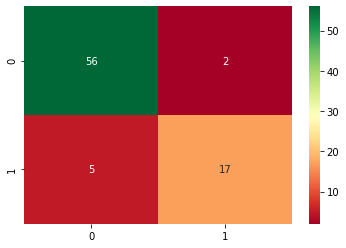

In [18]:
#Note it can be beneficial to check if you have any null values via: SuvData.isnull().sum()
#Extract some arrays with the use of iloc and [], and for the X data nested [[]]s:
X= SuvData.iloc[:,[1,2,3]].values
Y= SuvData.iloc[:,[4]].values
Z= SuvData.iloc[:,[5]].values

#Note if you see X.shape, and Y,shape not showing some line up of dimenssions, you might have to use numpy.reshape() 

X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size = 0.20, random_state=0)

#The following preprocessing is added to the algorythm in order to divide out the standard deviation from each point.
#This is done because we have too much variance in the salary so that it ranges from 0 to 1.
prep_scaled = pp.StandardScaler()
X_train=prep_scaled.fit_transform(X_train)
X_test=prep_scaled.transform(X_test)

#Now the logistic regression implementation
LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train, Y_train)

#Test this out and show the accuracy score
Y_predict=LogReg.predict(X_test)
#Y_predict

accuracy = metrics.accuracy_score(Y_test,Y_predict)*100
print("Acuracy: " + str(accuracy)+ "%")
Y_mat=metrics.confusion_matrix(Y_test,Y_predict)
sbn.heatmap(Y_mat,annot=True, cmap='RdYlGn')

<font color='purple'>__Now let's try to run the same functions on the Z array which was the split 4 ways between gender and purchases.__<font>

Acuracy: 91.25


C:\Users\djloq\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(87.0, 0.5, 'Actual')

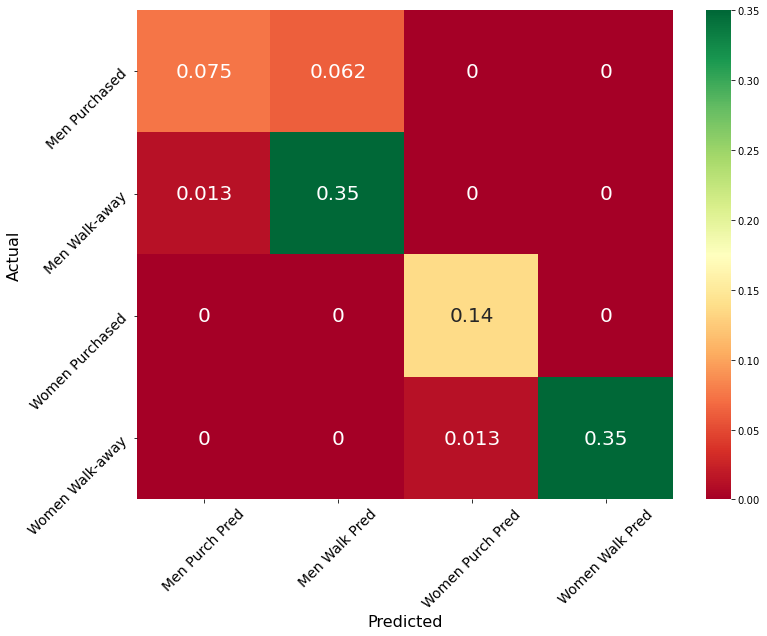

In [45]:
X_train, X_test, Z_train, Z_test =train_test_split(X,Z,test_size = 0.20, random_state=0)

prep_scaled_Z = pp.StandardScaler()
X_train=prep_scaled_Z.fit_transform(X_train)
X_test=prep_scaled_Z.transform(X_test)

LogReg_Z = LogisticRegression(random_state=0)
LogReg_Z.fit(X_train, Z_train)

Z_predict=LogReg_Z.predict(X_test)

accuracy = metrics.accuracy_score(Z_test,Z_predict)*100
print("Acuracy: " + str(accuracy))

#Now let's plot this one and convert the confusion to a dataframe for readability:
Z_mat=metrics.confusion_matrix(Z_test,Z_predict)
Z_dfmat=pd.DataFrame(Z_mat)
#This had to be in the right order; based on the conditions array listed above.
Z_dfmat.columns = ['Men Purch Pred', 'Men Walk Pred', 'Women Purch Pred', 'Women Walk Pred']
Z_dfmat.index = ['Men Purchased', 'Men Walk-away', 'Women Purchased', 'Women Walk-away']

#Show the percentage of each category that was accurately predicted by gender. 
Mat_sum=Z_mat.sum()
Mat_sum
Z_dfmat = Z_dfmat.astype('float')/Mat_sum
plt.subplots(figsize=(12,9))
sbn.heatmap(Z_dfmat,annot=True, cmap='RdYlGn',annot_kws={'size':20})
plt.yticks(rotation=45, fontsize = 14)
plt.xticks(rotation=45, fontsize=14)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)

<font color ='purple'>__This is a breakdown of the counts of the 4 new categories.__<font>

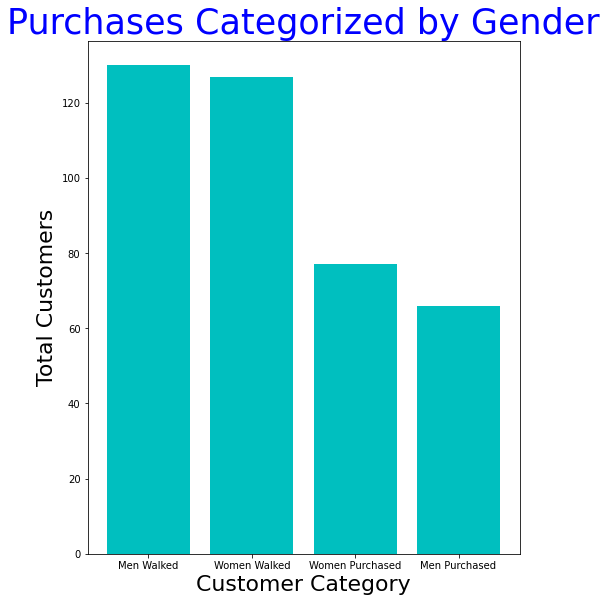

In [20]:
four_cats = SuvData['Gender_purchase_evenIsPurchased'].value_counts()
cht = plt.figure(figsize=(4,4.75))
meas = cht.add_axes([.75,.75,1.5,1.5])
meas.bar(np.arange(0,4,1),four_cats,align='center', color ='c')
meas.set_xticks(np.arange(0,4,1))
meas.set_xticklabels(["Men Walked","Women Walked", "Women Purchased","Men Purchased"])
meas.set_xlabel("Customer Category", fontsize=22)
meas.set_ylabel("Total Customers",fontsize=22)
meas.set_title("Purchases Categorized by Gender", fontsize=35, color ='b')
plt.show()


<font color='purple'>__Now let's try to break the confusion matricies down into the sub categorical pairs__<font> <br/>
    You can somewhat see the process here: https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/  
    further, there is a guide to setting this up: https://stackoverflow.com/questions/62722416/plot-confusion-matrix-for-multilabel-classifcation-python

array([[[68,  1],
        [ 5,  6]],

       [[46,  5],
        [ 1, 28]],

       [[68,  1],
        [ 0, 11]],

       [[51,  0],
        [ 1, 28]]], dtype=int64)

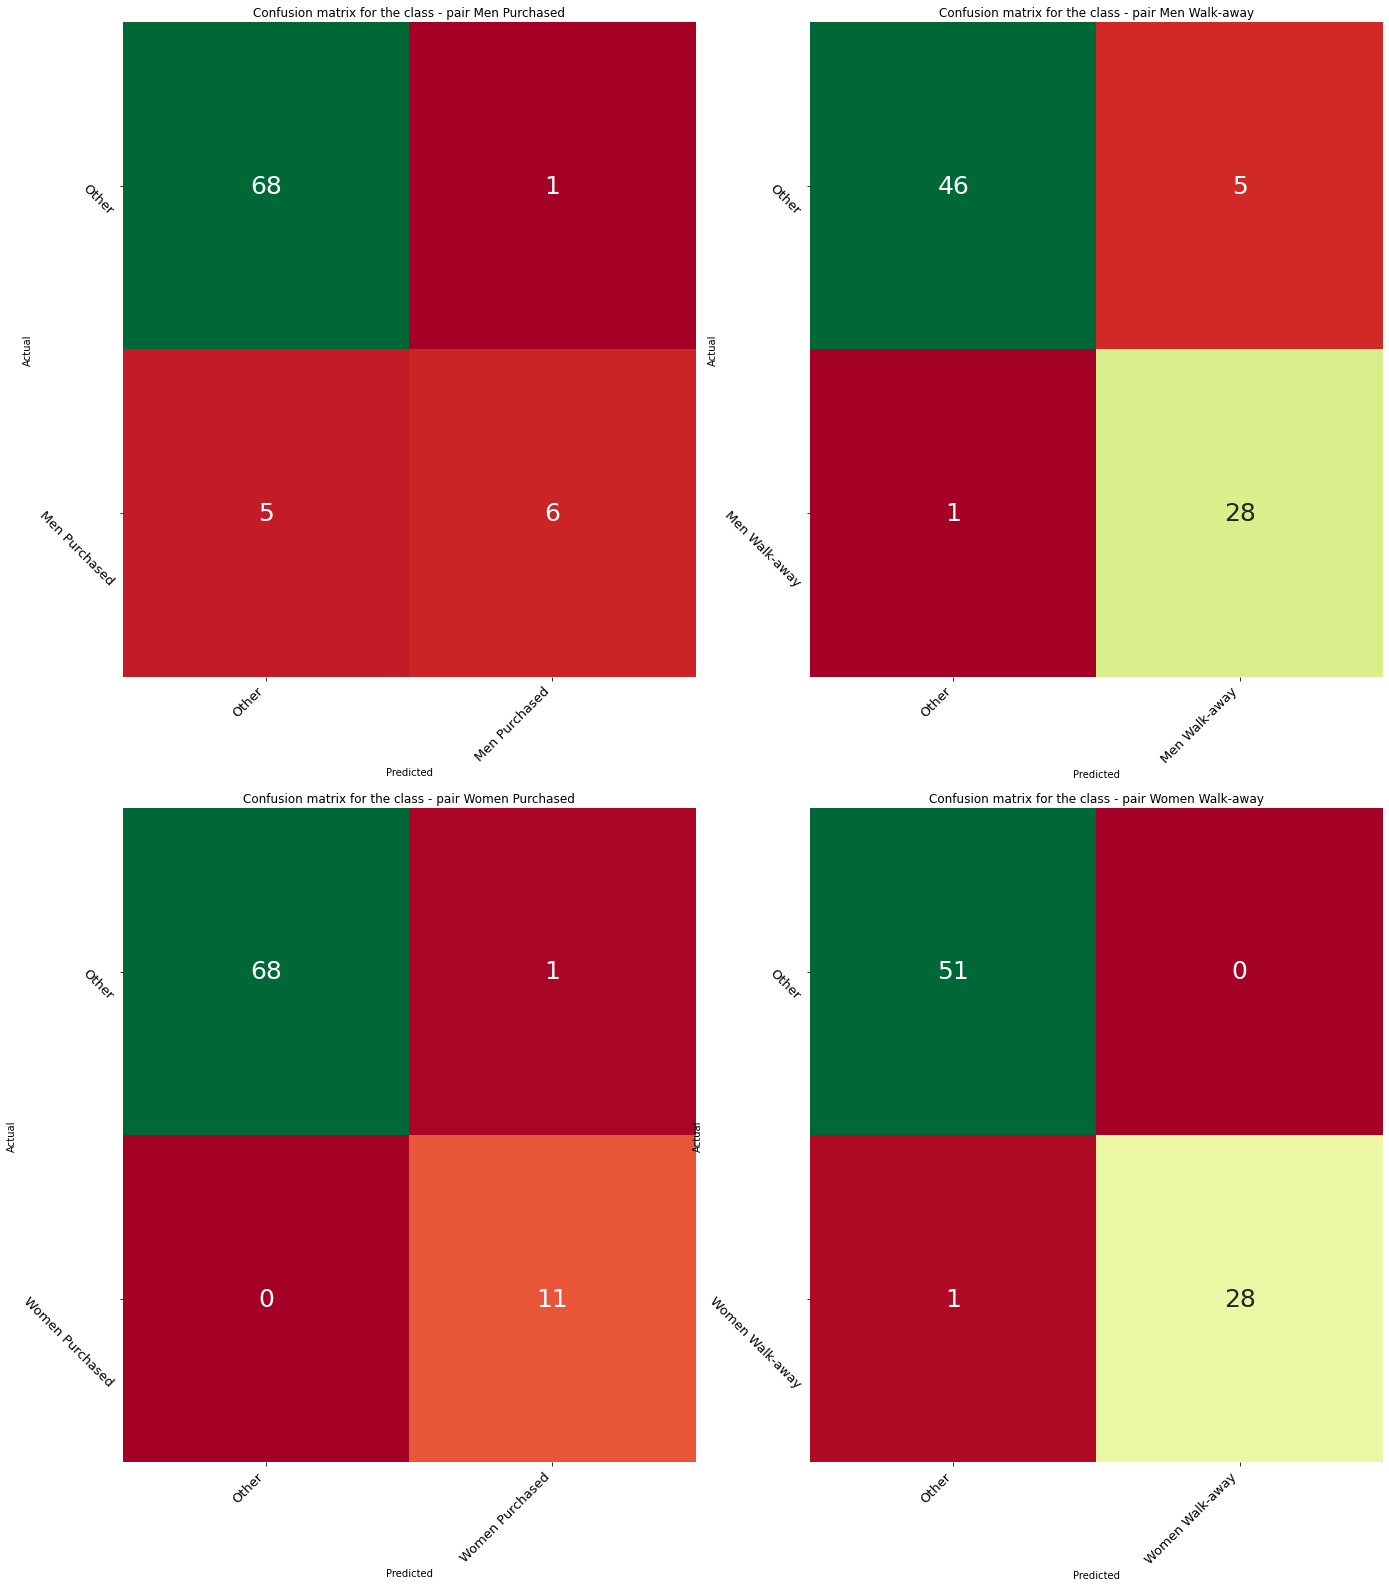

In [21]:
Mult_mat = metrics.multilabel_confusion_matrix(Z_test,Z_predict, labels=[0,1,2,3])
#Now you want to create a label set based on the set. Note that join here seems to be a concatenation.
labels = ["".join("pair " + Z_dfmat.index[i]) for i in range(0,4)]

#Note this process could help you plot out the errors you will see in many confusion matricies
def print_confusion_matrix(conf_mat, axes, class_label, class_names, fontsize = 13):
    df_cm = pd.DataFrame(conf_mat, index=class_names, columns = class_names)
    heatmap = sbn.heatmap(df_cm, annot = True, cmap='RdYlGn', cbar =False, annot_kws={'size':25}, ax=axes)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=-45,  ha='right',fontsize = fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,  ha='right',fontsize = fontsize)
    axes.set_ylabel("Actual")
    axes.set_xlabel("Predicted")
    axes.set_title("Confusion matrix for the class - " + class_label)
    
#Now see the defined setting of axis, titles, heatmaps, and ticklabels in the right order. Note the zip() sort of groups a 
#series of values that might be in separate arrays and bunches them one by one. Flatten() just breaks n-dimensions into one
#flat dimension vector
fig, ax = plt.subplots(2,2,figsize = (10,8))
    
#Now, you need to just look closer at the labels and see if we can't come up with something better than "Y" & "N"
for axes, cfs_matrix, label,field in zip(ax.flatten(), Mult_mat, labels, Z_dfmat.index):
    print_confusion_matrix(cfs_matrix,axes,label,["Other",field])
    
    plt.subplots_adjust(top=2.75,bottom=0.25,right = 2.25, left = 0.5)
    #plt.show()
Mult_mat


<font color='purple'>__The only insight given at this point is that logistic regression might be improved upon for the male predictions. Here, slice the data so we  have arrays for only the male data:__<font>

In [23]:
#Get the data split up
Male_SUVData = SuvData.loc[(SuvData['Gender_int']==1)]
Fem_SUVData = SuvData.loc[(SuvData['Gender_int']==0)]
XM= Male_SUVData.iloc[:,[1,2,3]].values
YM= Male_SUVData.iloc[:,[4]].values
XMale_Train,XMale_Test, YMale_Train, YMale_Test = train_test_split(XM,YM,test_size = 0.20, random_state=0)


<font color='purple'>__Now, let's try a few alternatives with Random Forest, Support Vectors, Random Forrest, and Naive Bayes. Between the use of the eval() logic and some guidance for looping over models from StackOverflow, we were able to combine functions, concatenations, and loops to evaluate these different models against logistic regression.__<font><br/>
Looping:  https://stackoverflow.com/questions/56602214/how-can-i-iterate-over-a-list-of-models-in-python-with-scikit-learn/56603073 <br/>
    Also, see if you can follow the eval() logic here: https://www.kite.com/python/answers/how-to-call-a-function-by-its-name-as-a-string-in-python

<ipython-input-26-1c56eb7503ab>:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modval.fit(XMale_Train,YMale_Train)
<ipython-input-26-1c56eb7503ab>:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modval.fit(XMale_Train,YMale_Train)
<ipython-input-26-1c56eb7503ab>:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modval.fit(XMale_Train,YMale_Train)
<ipython-input-26-1c56eb7503ab>:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modval.fit(XMale_Train,YMale_Train)
<ipython-input-26-1c56eb7503ab>:47: DataConversionWarning: A column-vector y was pas

[90.0, 85.0, 90.0, 90.0, 90.0, 85.0]


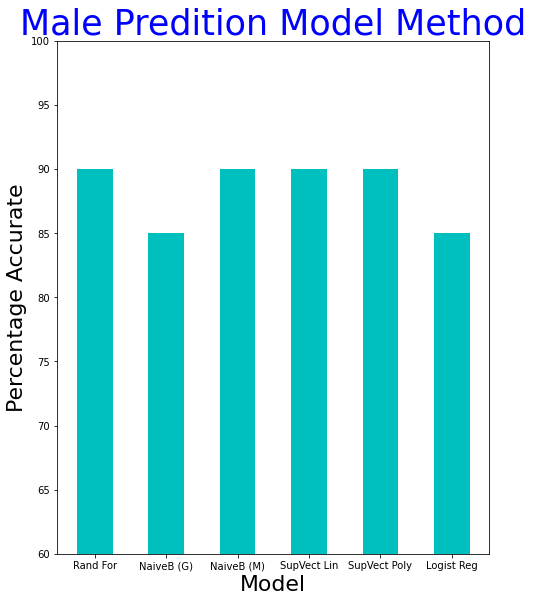

In [26]:

YM= Male_SUVData.iloc[:,[4]].values
XMale_Train, XMale_Test, YMale_Train, YMale_Test = train_test_split(XM,YM,test_size = 0.20, random_state=0)

prep_scaled_XM = pp.StandardScaler()
XMale_Train=prep_scaled_XM.fit_transform(XMale_Train)
XMale_Test = prep_scaled_XM.transform(XMale_Test)


def IterateModel(func:list, args:list , XMale_Train: np.array, XMale_Test: np.array):
    for model in func:
        mod = eval(model + "(" + args[i] + ")") 
        mod.fit(XMale_Train,YMale_Train)
        svm_pred = mod.predict(XMale_test)
        return metrics.accuracy_score(YMale_Test,svm_pred)

Mods=[["RandomForestClassifier", "n_estimators=50,max_depth=15"],
     ["GaussianNB",""],
     ["MultinomialNB",""],
     ["svm.SVC","kernel='linear'"],
     ["svm.SVC","kernel='poly'"],
     ["LogisticRegression", "random_state=0"]]

#For charting purposes
Mod_Lab =["Rand For", "NaiveB (G)", "NaiveB (M)", "SupVect Lin", "SupVect Poly", "Logist Reg"]
n=5
x_len = np.arange(n,(len(Mod_Lab)+1)*n,n)

Mods = pd.DataFrame(Mods)

lis1=Mods[0].tolist()
lis2=Mods[1].tolist()

ModuleList= []

#Create a list of function and parameter calls so we can iterate through them. Note append is appropriate for lists here:
for i in range(len(lis1)):
    m = lis1[i] + "(" + lis2[i] + ")"
    ModuleList.append(m)

    
 
#Now define a function to iterate through the ModuleList    
def combvals(Modu):
    for i in range(len(Modu)):
        modval = eval(ModuleList[i])
        #modval = Modu[i]
        modval.fit(XMale_Train,YMale_Train) 
        mod_pred = modval.predict(XMale_Test)
        mod_accuracy = metrics.accuracy_score(YMale_Test,mod_pred)*100
        return mod_accuracy
               
#Note you have to set up a variable that represents the function you are trying to run when using eval(), this doesn't call
#the function combvals itself. See the second link above this section. Here is another link: https://www.programiz.com/python-programming/methods/built-in/eval

#This is useful if you need to debug: pdb.set_trace()

AccuracyList = []
#We want to use the eval() function to actually run the strings created when setting variables equal to our functions.

for i in range(len(lis1)):
    m= combvals(ModuleList)
    AccuracyList.append(m)

print(AccuracyList)    

#Now plot the results so you can see the accuracy hasn't imroved yet:
fig = plt.figure(figsize=(4,4.75))
ax = fig.add_axes([.75,.75,1.5,1.5])
ax.bar(x_len,AccuracyList,align='center', color ='c', width = n/2)
ax.set_xticks(x_len)
ax.set_xticklabels(Mod_Lab)
ax.set_xlabel("Model", fontsize=22)
ax.set_ylabel("Percentage Accurate",fontsize=22)
ax.set_title("Male Predition Model Method", fontsize=35, color ='b')
plt.ylim([60,100])
plt.show()
    

<font color='green'>__Here are some other resources that might be helpful:__<font><br/>
    Good resource for parameter tuning: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/ <br/>
    Good resource for overall guide to kernals and support vector machines: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python <br/>
    When you are done, these are some great projects to tackle: https://www.crio.do/blog/5-interesting-machine-learning-projects/ <br/>
    Here is a larger and more diverse dataset to practive with as a future suggestion: <br/>
    https://towardsdatascience.com/a-beginners-guide-to-data-analysis-machine-learning-with-python-adult-salary-dataset-e5fc028b6f0a
    